Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a box plot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# prompt: List down the features and their types (e.g., numeric, nominal) available in the dataset.

# List down the features and their types
features = list(iris.columns)
types = []
for feature in features:
  if iris[feature].dtype == 'object':
    types.append('nominal')
  else:
    types.append('numeric')

# Print the features and their types
for i, feature in enumerate(features):
  print(f"{i+1}. {feature}: {types[i]}")


1. sepal_length: numeric
2. sepal_width: numeric
3. petal_length: numeric
4. petal_width: numeric
5. species: nominal


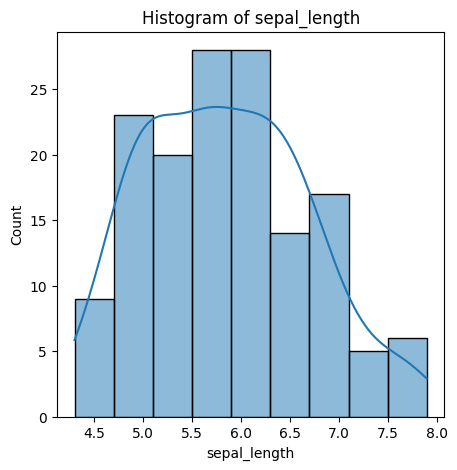

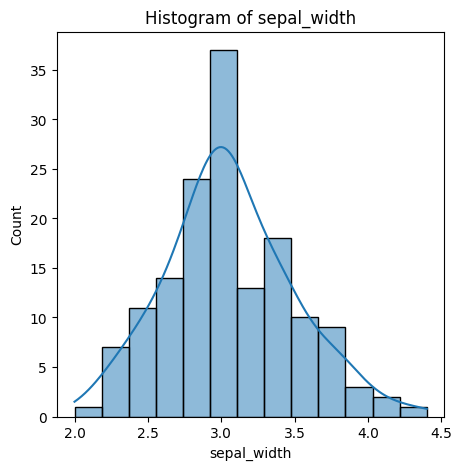

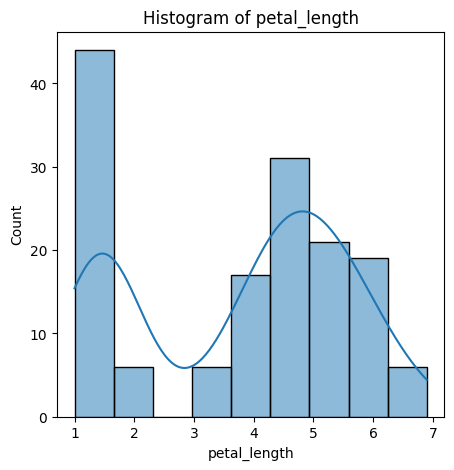

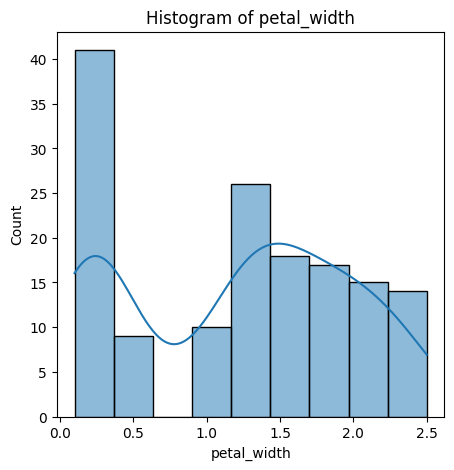

In [ ]:
# prompt: Create a histogram for each feature in the dataset to illustrate the feature distributions.

# Create a histogram for each feature
for feature in features:
  if feature == "species":
    break
  plt.figure(figsize=(5, 5))
  sns.histplot(iris[feature], kde=True)
  plt.title(f"Histogram of {feature}")
  plt.show()


In [ ]:
def fun1(value):
  if value == "setosa":
    return 0
  elif value == "versicolor":
    return 1
  elif value == "virginica":
    return 2
  else:
    return 0

iris['species'] = iris['species'].apply(fun1)
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


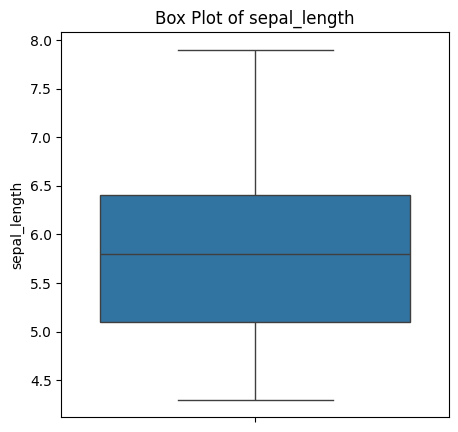

Outliers for sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


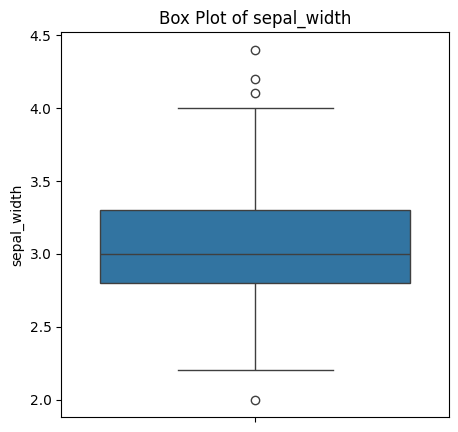

Outliers for sepal_width:
    sepal_length  sepal_width  petal_length  petal_width  species
15           5.7          4.4           1.5          0.4        0
32           5.2          4.1           1.5          0.1        0
33           5.5          4.2           1.4          0.2        0
60           5.0          2.0           3.5          1.0        1


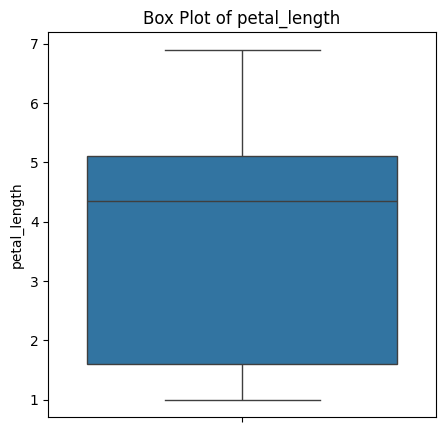

Outliers for petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


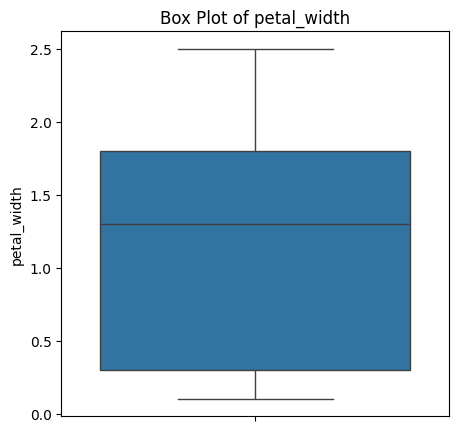

Outliers for petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


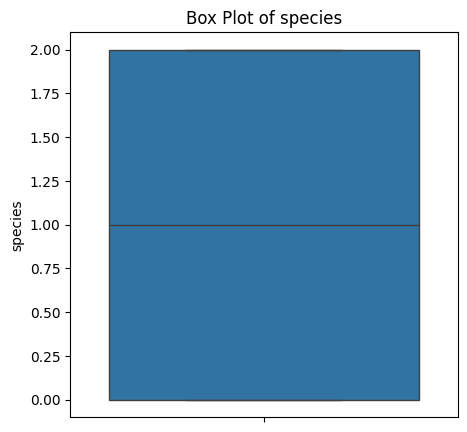

In [ ]:
# prompt: Create a BoxPlot for each feature in the dataset to illustrate the feature distributions.

# Create a Box Plot for each feature
for feature in features:
  plt.figure(figsize=(5, 5))
  sns.boxplot(iris[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()
  if feature == "species":
    continue
  # Identify outliers
  Q1 = iris[feature].quantile(0.25)
  Q3 = iris[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = iris[~((iris[feature] >= lower_bound) & (iris[feature] <= upper_bound))]
  print(f"Outliers for {feature}:")
  print(outliers)
